In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn


In [2]:
# set the number of the hidden units for both the hidden layer and the output layer 

n_h = 5 
n_y = 1 

In [3]:
def initialize_params(X, Y, n_h): 
    '''
    this function will intialize all parameters of the neural network
    '''

    n_x = X.shape[0]
    n_y = Y.shape[0]


    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return params

In [4]:
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

In [5]:
def forward_prop(X, params): 
    '''
    This function will calculat Z1, A1, Z2 and A2
    '''

    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    Z1 = np.dot(W1, X) + b1 
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2 
    A2 = sigmoid(Z2)   # probabilities

    cache = { 
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }


    return A2, cache


In [13]:
def compute_cost(A2, Y, m): 
    logprobs = np.dot(Y, np.log(A2).T) + np.dot((1 - Y), np.log(1 - A2).T)
    cost = - logprobs / m

    cost = float(np.squeeze(cost))
    return cost 

In [7]:
def backward_prop(params, cache, X, Y, m): 
    '''
    Calculat dW1, db1, dW2, db2 
    '''
    W1 = params["W1"]
    W2 = params["W2"]

    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]


    dZ2 = A2 - Y 
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.pow(A1, 2))
    dW1 = np.dot(dZ1, X.T) / m 
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {
        "dW1": dW1,
        "dW2": dW2,
        "db1": db1,
        "db2": db2,
        
    }

    return  grads



In [8]:
def update_params(params, grads, learning_rate): 

    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]

    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]

    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

    params = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }

    return params 

In [41]:
def model(X, Y, n_h, num_iterations = 10000, learning_rate = 0.1, print_loss = False):

    np.random.seed(3)


    m = X.shape[1]

    params = initialize_params(X, Y, n_h)

    for i in range(num_iterations): 

        A2, cache = forward_prop(X, params)
        cost = compute_cost(A2, Y, m)

        grads = backward_prop(params, cache, X, Y, m)
        params = update_params(params, grads, learning_rate)


        if i % 100 == 0 and print_loss: 
            print(f"itration : {i}, Cost: {cost}")
        if i == 10000: 
            learning_rate *= 0.01 

    return params

    
    


In [10]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [11]:
X, Y = load_planar_dataset()

In [14]:
params = model(X, Y, n_h = 5, num_iterations = 100000, learning_rate = 1.2, print_loss = True)

itration : 0, Cost: 0.6930818040716601
itration : 1000, Cost: 0.2539481640906749
itration : 2000, Cost: 0.20371750382374124
itration : 3000, Cost: 0.18942451982130915
itration : 4000, Cost: 0.18276429853981974
itration : 5000, Cost: 0.1784433900904707
itration : 6000, Cost: 0.17894124510527815
itration : 7000, Cost: 0.17724835513907988
itration : 8000, Cost: 0.17593856518372852
itration : 9000, Cost: 0.17490632461672398
itration : 10000, Cost: 0.17407131709223755
itration : 11000, Cost: 0.16964661774608897
itration : 12000, Cost: 0.16963390880320206
itration : 13000, Cost: 0.1696221047127974
itration : 14000, Cost: 0.1696107328879937
itration : 15000, Cost: 0.169599619542967
itration : 16000, Cost: 0.16958867552629414
itration : 17000, Cost: 0.16957784879031731
itration : 18000, Cost: 0.16956710730505797
itration : 19000, Cost: 0.16955643082236393
itration : 20000, Cost: 0.16954580630107827
itration : 21000, Cost: 0.16953522520308895
itration : 22000, Cost: 0.16952468184769479
itration

In [15]:
def predict(params, X):

    A2, _ = forward_prop(X, params)
    A2 = A2 > 0.5
    return A2 


In [16]:
# Print accuracy
predictions = predict(params, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 92%


/tmp/ipykernel_5921/2329709558.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')


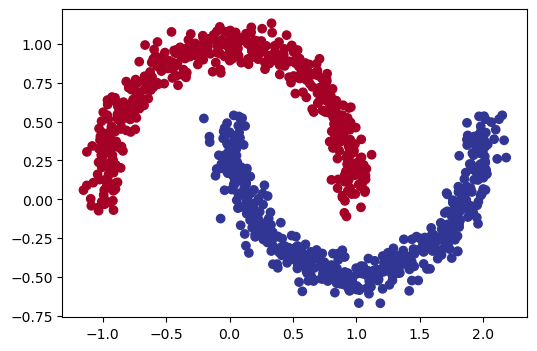

In [45]:
from sklearn.datasets import make_moons 
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, 
                noise=0.07,
                random_state=RANDOM_SEED)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_SEED
)

plt.figure(figsize=(6, 4))
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

X_train = X_train.T 
X_test = X_test.T

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)


In [38]:
y_train.shape, X_train.shape

((1, 800), (2, 800))

In [43]:
params = model(X_train, y_train, n_h = 5, num_iterations = 10000, learning_rate = 1.2, print_loss = True)

itration : 0, Cost: 0.6931453609700009
itration : 100, Cost: 0.2521427560591828
itration : 200, Cost: 0.2503708086180965
itration : 300, Cost: 0.24941727381114745
itration : 400, Cost: 0.24883019587192068
itration : 500, Cost: 0.2484321322535649
itration : 600, Cost: 0.2481409001165245
itration : 700, Cost: 0.2601581524961372
itration : 800, Cost: 0.24856408417112236
itration : 900, Cost: 0.24746678158205293
itration : 1000, Cost: 0.2470030503822086
itration : 1100, Cost: 0.24637681066483855
itration : 1200, Cost: 0.2445726087626894
itration : 1300, Cost: 0.07350210007611777
itration : 1400, Cost: 0.027808106449817543
itration : 1500, Cost: 0.016622379644162345
itration : 1600, Cost: 0.011725714493462026
itration : 1700, Cost: 0.009014887666999394
itration : 1800, Cost: 0.0073044189694304726
itration : 1900, Cost: 0.006130895732305222
itration : 2000, Cost: 0.005277503020819414
itration : 2100, Cost: 0.004629776793667679
itration : 2200, Cost: 0.00412177809311706
itration : 2300, Cost:

In [44]:
y_train_pred = predict(params, X_train)
y_test_pred = predict(params, X_test)
print ('Training Accuracy: %d' % float((np.dot(y_train, y_train_pred.T) + np.dot(1 - y_train, 1 - y_train_pred.T)) / float(y_train.size) * 100) + '%')
print ('Test Accuracy: %d' % float((np.dot(y_test, y_test_pred.T) + np.dot(1 - y_test, 1 - y_test_pred.T)) / float(y_test.size) * 100) + '%')

Training Accuracy: 100%
Test Accuracy: 100%


/tmp/ipykernel_5921/2814889223.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Training Accuracy: %d' % float((np.dot(y_train, y_train_pred.T) + np.dot(1 - y_train, 1 - y_train_pred.T)) / float(y_train.size) * 100) + '%')
/tmp/ipykernel_5921/2814889223.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Test Accuracy: %d' % float((np.dot(y_test, y_test_pred.T) + np.dot(1 - y_test, 1 - y_test_pred.T)) / float(y_test.size) * 100) + '%')


In [46]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

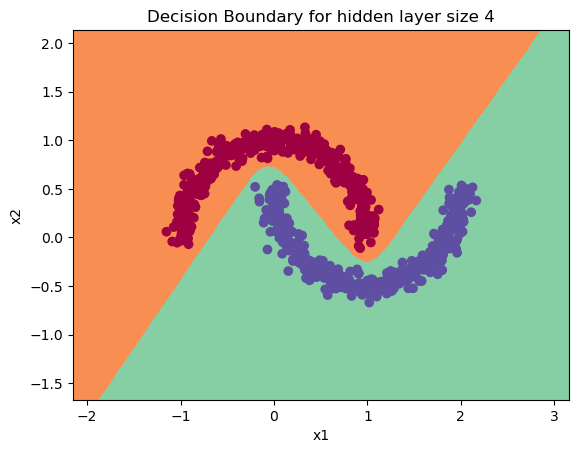

In [49]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(params, x.T), X_train, y_train)
plt.title("Decision Boundary for hidden layer size " + str(4))

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

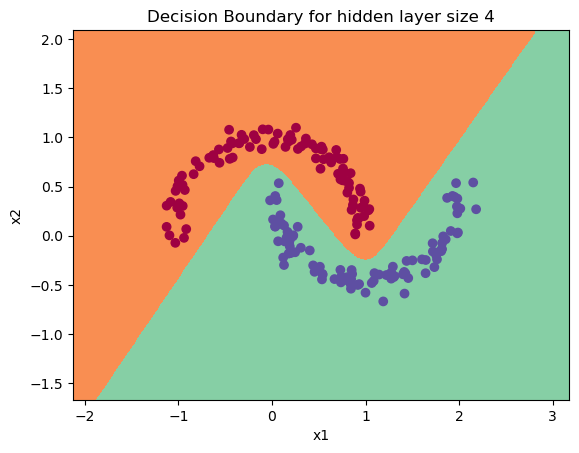

In [50]:
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(params, x.T), X_test, y_test)
plt.title("Decision Boundary for hidden layer size " + str(4))